# Скользящие агрегаты

В этом модуле будем работать с таблицей - `expenses`. Она показывает доходы и расходы одного из сотрудников (пусть это будет Марина) за 9 месяцев 2020 года:

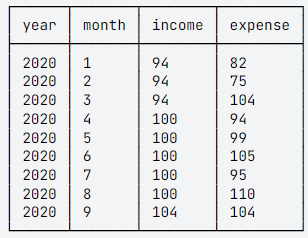

### 11 Задаем фрейм

Вот границы фрейма для пятой записи:

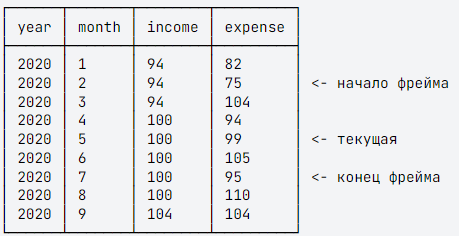

Как выглядит определение фрейма?

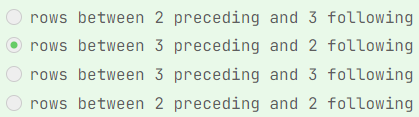

### 12 Задаем фрейм

Вот границы фрейма для седьмой записи:

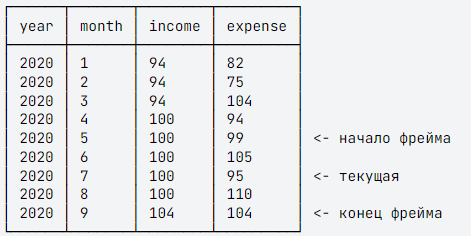

Как может выглядеть определение фрейма? Укажите все подходящие варианты.

Фрейм никогда не выходит за границы секции, если столкнулся с ней — обрезается.

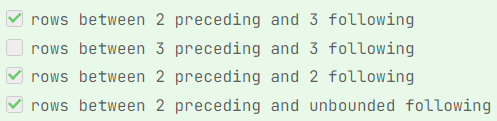

### 13 Скользящее среднее по доходам

Есть таблица доходов-расходов `expenses`. Мы хотим рассчитать скользящее среднее по доходам за предыдущий и текущий месяц:

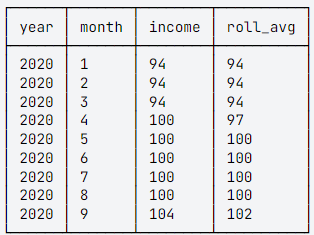

Напишите запрос, который это сделает.

Сортировка результата: year, month

In [ ]:
SELECT year,
       month,
       income,
       ROUND(AVG(income) OVER w) AS roll_avg
  FROM expenses
WINDOW w AS (ORDER BY year, month
             ROWS BETWEEN 1 PRECEDING AND CURRENT ROW)
 ORDER BY year, month

### 14 Фонд оплаты труда нарастающим итогом

Вернемся к таблице `employees`:

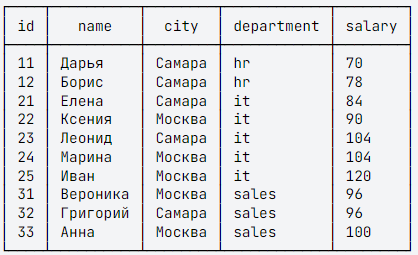

Мы хотим посчитать фонд оплаты труда нарастающим итогом независимо для каждого департамента:

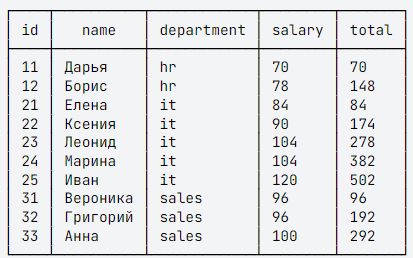

Напишите запрос, который это сделает.

Сортировка результата: department, salary, id

In [ ]:
SELECT id, 
       name, 
       department, 
       salary,
       SUM(salary) OVER w AS total
  FROM employees
WINDOW w AS (PARTITION BY department 
             ORDER BY department, salary
             ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
 ORDER BY department, salary, id